## Bayes' Theorem Example: Monty Hall Problem (or "Deal Or No Deal") <a class="anchor" id="five"></a>

A very famous stats mind trick... You might have seen this already.

The [Monty Hall Problem](https://en.wikipedia.org/wiki/Monty_Hall_problem) was originally posed (and solved) in a letter by Steve Selvin to the American Statistician in [1975](https://www.tandfonline.com/doi/abs/10.1080/00031305.1975.10479121). It became famous as a question from reader Craig F. Whitaker's letter quoted in Marilyn vos Savant's "Ask Marilyn" column in Parade magazine in 1990


You are playing a TV game show and are shown 2 doors.  One has a car behind it, the other a goat.  What are your chances of picking the door with the car?

OK, now there are 3 doors: one with a car, two with goats.  The game show host asks you to pick a door, but not to open it yet.  Then the host opens one of the other two doors (that you did not pick) and that has a goat.  The host offers you the opportunity to switch doors.

- One player decides to switch
- Another player prefers to stay with the previous choice
 
![https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Monty_open_door.svg/180px-Monty_open_door.svg.png](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Monty_open_door.svg/180px-Monty_open_door.svg.png)

- Now a third player comes in who has not seen what happened earlier. They pick a door.

*Which of the three players is most likely to win?*

You might know or remember the answer already... but don't think now! **Let's simulate it**. 


### Simulate the Monty Hall Problem

- Simulate three doors, one car, and two goats.
 - Simulate three players: the switcher, the conservative, and the newcomer. 
 - Record who wins.
 - Repeat it many times.
 - Which player do you want to be?


In [132]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [106]:
np.where((doors_idx!=car_idx))[0]

array([0, 2], dtype=int64)

switcher 39.26
conservative 32.99
newcome 49.74


Text(0.5, 1.0, '3 doors Monty Hall Problem: $N_{iteration}=1.0e+04$')

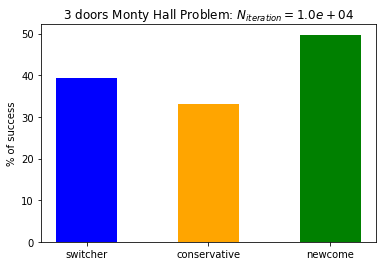

In [139]:
N_doors = 3
N_iter = 10000

switch = np.zeros(N_iter)
cons = np.zeros(N_iter)
newcome = np.zeros(N_iter)

for i in range(N_iter):
    doors_idx = np.arange(0,N_doors)
    
    # extract the index for the door with the car behind:
    car_idx = np.random.choice(np.arange(0,N_doors))
    
    # initial choice:
    init_door = np.random.choice(np.arange(0,N_doors))
    
    # opening of the third door:
    if(init_door!=car_idx):
        opened_door_idx = np.where((doors_idx!=car_idx)&(doors_idx!=init_door))[0][0]

    if(init_door==car_idx):
        opened_door_idx = np.random.choice(np.where((doors_idx!=car_idx))[0])
        
    doors_left_idx = np.delete(doors_idx, opened_door_idx)
        
     # final door's choice
    switch_idx = np.where((doors_left_idx!=init_door))[0][0]
    cons_idx = init_door
    newcome_idx = np.random.choice(doors_left_idx)
    
    # increment if the door is the one with the car behind
    if(switch_idx==car_idx):
        switch[i] = 1
        
    if(cons_idx==car_idx):
        cons[i] = 1
        
    if(newcome_idx==car_idx):
        newcome[i] = 1
      
    
# compute the total number of correct choice
switch_result = np.sum(switch)
cons_result = np.sum(cons)
newcome_result = np.sum(newcome)

# plot
results = [switch_result,cons_result,newcome_result]
x_pos = ['switcher', 'conservative', 'newcome']
colors = ['blue', 'orange', 'green']
#label = ['switcher', 'conservative', 'newcome']

for i in range(len(results)):
    plt.bar(x_pos[i],results[i]/N_iter*100,width=0.5,color=colors[i])
    print(x_pos[i], results[i]/N_iter*100)
    
    
plt.ylabel(r'% of success')
plt.title(r'%i doors Monty Hall Problem: $N_{iteration}=%.1e$'%(N_doors,N_iter))

- What would happen if you had 100 doors to choose from and the presenter opens 98 or them?

Percentage of success:
switcher 1.04
conservative 0.9400000000000001
newcome 50.41


Text(0.5, 1.0, '100 doors Monty Hall Problem: $N_{iteration}=1.0e+04$')

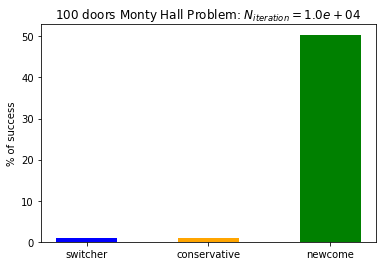

In [140]:
N_doors = 100
N_iter = 10000

switch = np.zeros(N_iter)
cons = np.zeros(N_iter)
newcome = np.zeros(N_iter)

for i in range(N_iter):
    doors_idx = np.arange(0,N_doors)
    
    # extract the index for the door with the car behind:
    car_idx = np.random.choice(np.arange(0,N_doors))
    
    # initial choice:
    init_door = np.random.choice(np.arange(0,N_doors))
    
    # opening of the third door:
    if(init_door!=car_idx): 
        opened_door_idx = np.where((doors_idx!=car_idx)&(doors_idx!=init_door))[0]

    if(init_door==car_idx):
        possible_open_idx = np.where((doors_idx!=car_idx))[0]
        not_opened = np.random.choice(possible_open_idx[:-1])
        opened_door_idx = np.delete(possible_open_idx,not_opened)
        
    doors_left_idx = np.delete(doors_idx, opened_door_idx)
        
     # final door's choice
    switch_idx = np.where((doors_left_idx!=init_door))[0][0]
    cons_idx = init_door
    newcome_idx = np.random.choice(doors_left_idx)
    
    # increment if the door is the one with the car behind
    if(switch_idx==car_idx):
        switch[i] = 1
        
    if(cons_idx==car_idx):
        cons[i] = 1
        
    if(newcome_idx==car_idx):
        newcome[i] = 1
      
    
# compute the total number of correct choice
switch_result = np.sum(switch)
cons_result = np.sum(cons)
newcome_result = np.sum(newcome)



# plot
results = [switch_result,cons_result,newcome_result]
x_pos = ['switcher', 'conservative', 'newcome']
colors = ['blue', 'orange', 'green']
#label = ['switcher', 'conservative', 'newcome']

print('Percentage of success:')
for i in range(len(results)):
    plt.bar(x_pos[i],results[i]/N_iter*100,width=0.5,color=colors[i])
    print(x_pos[i], results[i]/N_iter*100)
    
    
plt.ylabel(r'% of success')
plt.title(r'%i doors Monty Hall Problem: $N_{iteration}=%.1e$'%(N_doors,N_iter))

- And what if you had $N$ doors to choose from and the presenter opens $M\leq N-2$ of them? Study how the probability of winning changes as a function of $M$ and $N$.

100%|██████████| 8/8 [00:06<00:00,  1.18it/s]


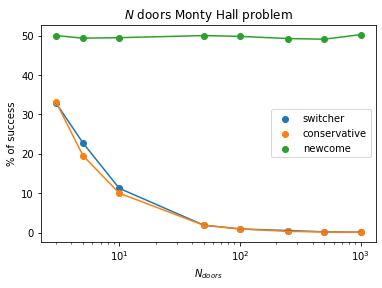

In [145]:
N_doors = [3,5,10,50,100,250,500,1000]
N_iter = 10000

switch_result = np.zeros(len(N_doors))
cons_result = np.zeros(len(N_doors))
newcome_result = np.zeros(len(N_doors))

# iterate over different possible number of doors
for j in tqdm(range(len(N_doors))):
    
    switch = np.zeros(N_iter)
    cons = np.zeros(N_iter)
    newcome = np.zeros(N_iter)

    for i in range(N_iter):
        doors_idx = np.arange(0,N_doors[j])
    
        # extract the index for the door with the car behind:
        car_idx = np.random.choice(np.arange(0,N_doors[j]))
    
        # initial choice:
        init_door = np.random.choice(np.arange(0,N_doors[j]))
    
        # opening of the third door:
        if(init_door!=car_idx): 
            opened_door_idx = np.where((doors_idx!=car_idx)&(doors_idx!=init_door))[0]

        if(init_door==car_idx):
            possible_open_idx = np.where((doors_idx!=car_idx))[0]
            not_opened = np.random.choice(possible_open_idx[:-1])
            opened_door_idx = np.delete(possible_open_idx,not_opened)
        
        doors_left_idx = np.delete(doors_idx, opened_door_idx)
        
         # final door's choice
        switch_idx = np.where((doors_left_idx!=init_door))[0][0]
        cons_idx = init_door
        newcome_idx = np.random.choice(doors_left_idx)
    
        # increment if the door is the one with the car behind
        if(switch_idx==car_idx):
            switch[i] = 1
        
        if(cons_idx==car_idx):
            cons[i] = 1
        
        if(newcome_idx==car_idx):
            newcome[i] = 1
      
    
    # compute the total number of correct choice
    switch_result[j] = np.sum(switch)
    cons_result[j] = np.sum(cons)
    newcome_result[j] = np.sum(newcome)

# plot

plt.plot(N_doors,switch_result/N_iter*100)
plt.scatter(N_doors,switch_result/N_iter*100,label='switcher')

plt.plot(N_doors,cons_result/N_iter*100)
plt.scatter(N_doors,cons_result/N_iter*100,label='conservative')

plt.plot(N_doors,newcome_result/N_iter*100)
plt.scatter(N_doors,newcome_result/N_iter*100,label='newcome')

plt.xscale('log')
plt.xlabel(r'$N_{doors}$')
plt.ylabel(r'% of success')
plt.title(r'$N$ doors Monty Hall problem')

plt.legend()